In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [93]:
data = pd.read_csv("C:\\Users\\HP\\Downloads\\archive (2)\\Amazon.csv")
data.head()
data.dropna(inplace=True)
data
#Date - in format: yy-mm-dd
#Open - the price of the stock at market open
#High - Highest price reached in the day
#Low - Lowest price reached in the day
#Close - The stock closing at the end of the Market hours
#Adj Close - Is the closing price after adjustments for all applicable splits and dividend distributions.
#Volume - Number of shares traded

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [94]:
data.head()
data.describe().round().T
data.info()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


,count,mean,std,min,25%,50%,75%,max
Open,5842.0,373.0,586.0,1.0,38.0,83.0,360.0,3251.0
High,5842.0,377.0,592.0,1.0,39.0,85.0,363.0,3344.0
Low,5842.0,368.0,579.0,1.0,37.0,82.0,356.0,3151.0
Close,5842.0,373.0,586.0,1.0,38.0,83.0,360.0,3200.0
Adj Close,5842.0,373.0,586.0,1.0,38.0,83.0,360.0,3200.0
Volume,5842.0,7519048.0,7282683.0,487200.0,3684900.0,5657200.0,8533400.0,104329200.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5842 entries, 0 to 5841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5842 non-null   object 
 1   Open       5842 non-null   float64
 2   High       5842 non-null   float64
 3   Low        5842 non-null   float64
 4   Close      5842 non-null   float64
 5   Adj Close  5842 non-null   float64
 6   Volume     5842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 365.1+ KB


In [95]:
data.loc[0,'Date']

'1997-05-15'

In [96]:
data['Date'] = pd.to_datetime(data['Date'],format ='%Y-%m-%d')
data['Date'] 

0      1997-05-15
1      1997-05-16
2      1997-05-19
3      1997-05-20
4      1997-05-21
          ...    
5837   2020-07-27
5838   2020-07-28
5839   2020-07-29
5840   2020-07-30
5841   2020-07-31
Name: Date, Length: 5842, dtype: datetime64[ns]

In [97]:
data['Date'].max()

Timestamp('2020-07-31 00:00:00')

In [98]:
data['Date'].min()

Timestamp('1997-05-15 00:00:00')

In [99]:
data.loc[0,'Date'].day_name()

'Thursday'

In [100]:
data['Date'].dt.day_name()

0        Thursday
1          Friday
2          Monday
3         Tuesday
4       Wednesday
          ...    
5837       Monday
5838      Tuesday
5839    Wednesday
5840     Thursday
5841       Friday
Name: Date, Length: 5842, dtype: object

In [101]:
data.keys()

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [102]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [103]:
data.isnull().sum().sum()

0

In [104]:
data.loc['2020-07-31':'2020-02']['Close'].mean()

nan

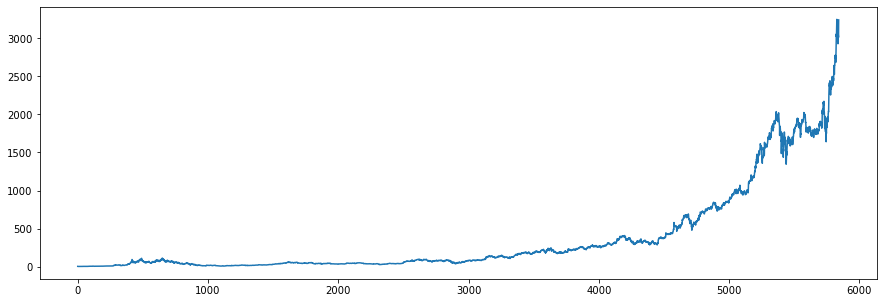

In [105]:

plt.rcParams.update({'figure.figsize':(15,5)})
import seaborn as sns

# plt.figure(figsize=(15,5))
# sns.distplot(data['Sales_quantity'])
plt.plot(data.Open)

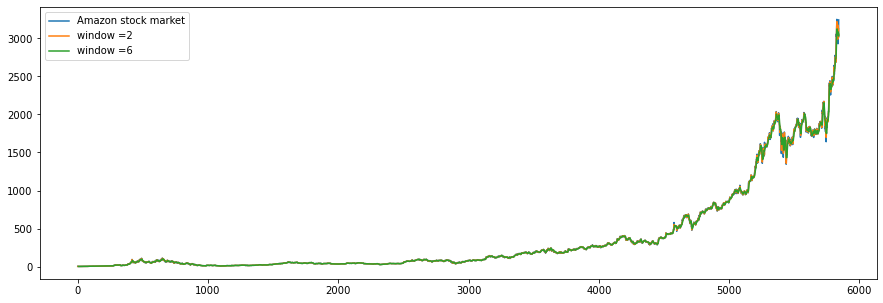

In [106]:
data['rolling_mean'] = data.Open.rolling( window=2).mean()
data['rolling_mean6'] = data.Open.rolling( window=6).mean()
plt.plot(data.Open, label='Amazon stock market')
plt.plot(data.rolling_mean, label = 'window =2')
plt.plot(data.rolling_mean6, label = 'window =6')
plt.legend(loc='best')

In [107]:
data.head(7)

,Date,Open,High,Low,Close,Adj Close,Volume,rolling_mean,rolling_mean6
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,2.203125,NaN
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.864583,NaN
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.744792,NaN
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.682292,NaN
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800,1.536458,1.828125
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200,1.421875,1.656250


In [108]:
data.index = data.Date

In [84]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data.Open, autolag='AIC')

In [85]:
dftest

(5.55869004099483,
 1.0,
 34,
 5807,
 {'1%': -3.431476604615945,
  '5%': -2.8620378526446375,
  '10%': -2.567035004946881},
 47795.12230630202)

In [86]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                    5.558690
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    5807.000000
Critical Value (1%)              -3.431477
Critical Value (5%)              -2.862038
Critical Value (10%)             -2.567035
dtype: float64


In [87]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,rolling_mean,rolling_mean6
Date,,,,,,,,,
1997-05-15,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,NaN,NaN
1997-05-16,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,2.203125,NaN
1997-05-19,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.864583,NaN
1997-05-20,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.744792,NaN
1997-05-21,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.682292,NaN
...,...,...,...,...,...,...,...,...,...
2020-07-27,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500,2996.000000,3074.659993
2020-07-28,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700,3058.135010,3083.671672
2020-07-29,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100,3042.630005,3050.088338


<AxesSubplot:xlabel='Date'>

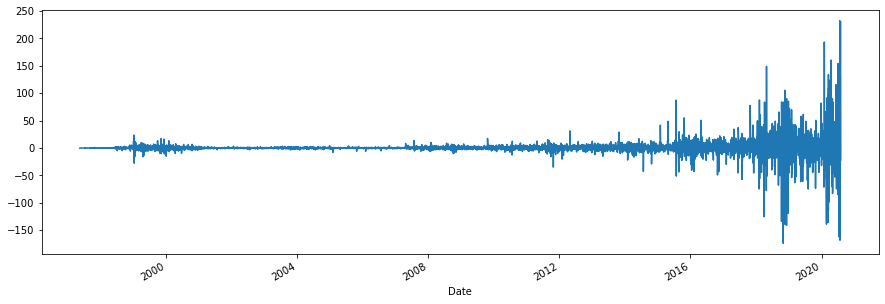

In [88]:
data['Open'] = data['Open'] - data['Open'].shift(1)
data['Open'].dropna(inplace=True)
data['Open'].dropna().plot()

In [112]:
dftest = adfuller(data['Open'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
     dfoutput['Critical Value (%s)'%key] = np.round(value, 1)
print (dfoutput)



Test Statistic                    5.55869
p-value                           1.00000
#Lags Used                       34.00000
Number of Observations Used    5807.00000
Critical Value (1%)              -3.40000
Critical Value (5%)              -2.90000
Critical Value (10%)             -2.60000
dtype: float64


In [110]:
data['log'] = np.log(data.Open)

In [111]:
dftest = adfuller(data['log'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
   dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Test Statistic                   -1.645604
p-value                           0.459334
#Lags Used                       34.000000
Number of Observations Used    5807.000000
Critical Value (1%)              -3.431477
Critical Value (5%)              -2.862038
Critical Value (10%)             -2.567035
dtype: float64


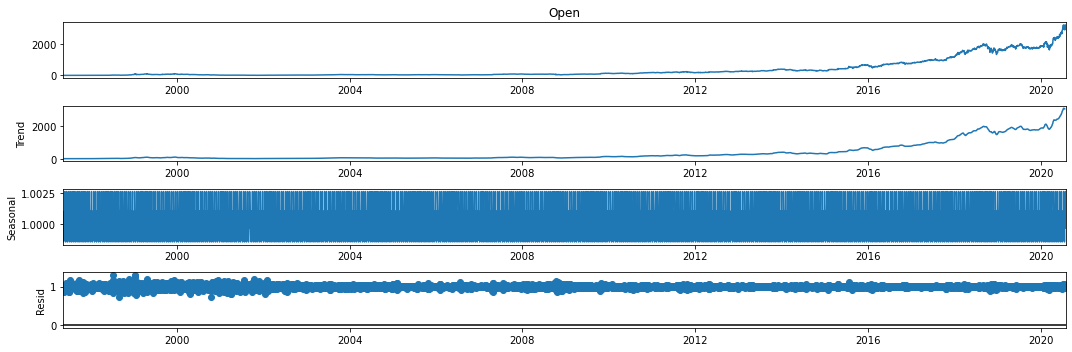

In [113]:
import statsmodels.api as sm
# multiplicative
res = sm.tsa.seasonal_decompose(data.Open,period=12,model="multiplicative")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

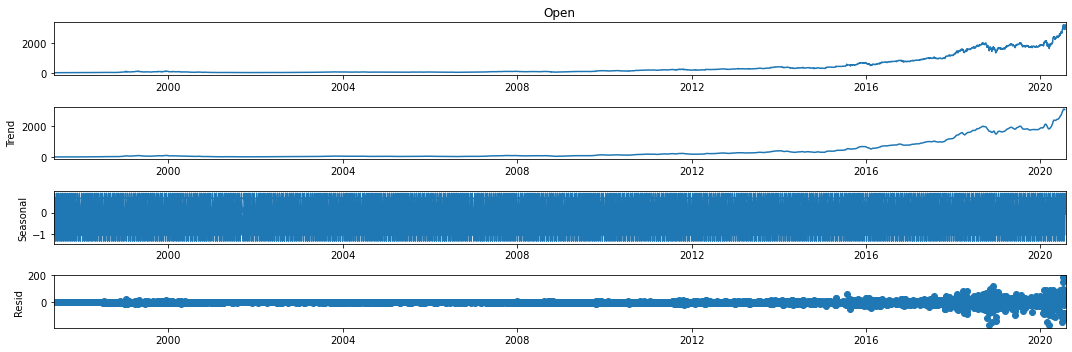

In [114]:
res = sm.tsa.seasonal_decompose(data.Open,period=12,model="additive")
#plt.figure(figsize=(16,12))
fig = res.plot()
#fig.show()

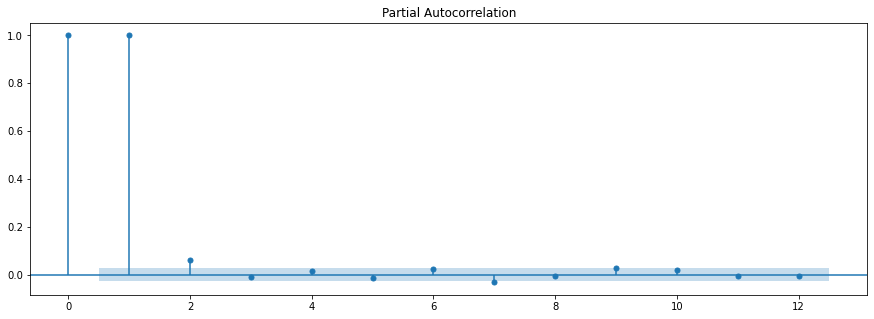

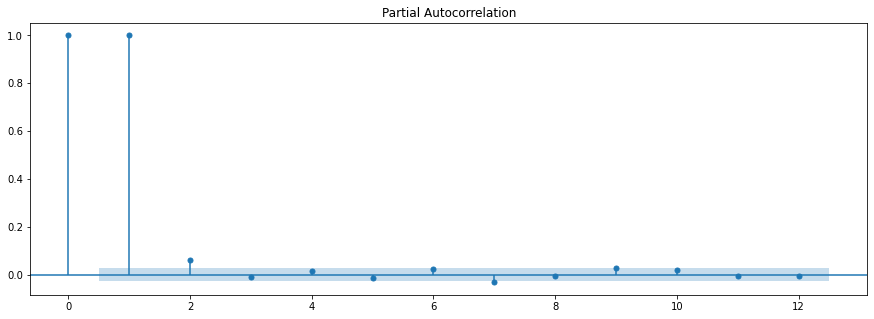

In [115]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data['log'], lags=12, method='ols')
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Partial Autocorrelation Function')

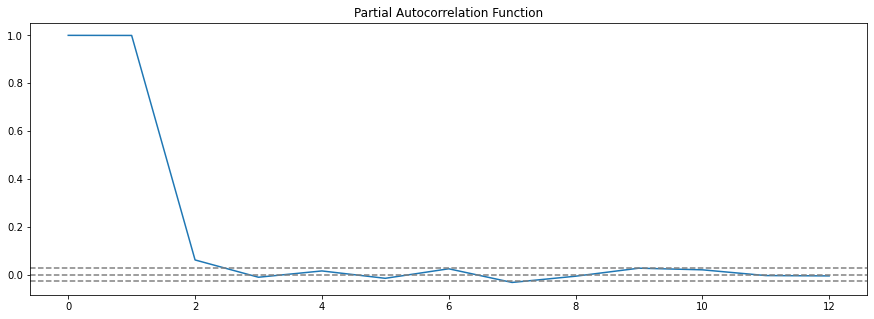

In [116]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data['log'], nlags=12)
lag_pacf = pacf(data['log'], nlags=12, method='ols')


plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')

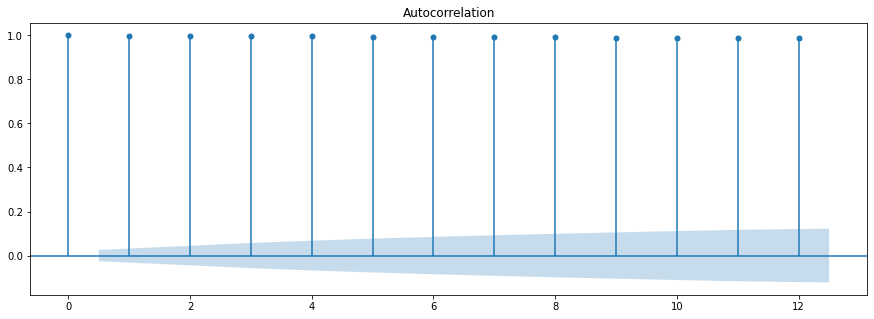

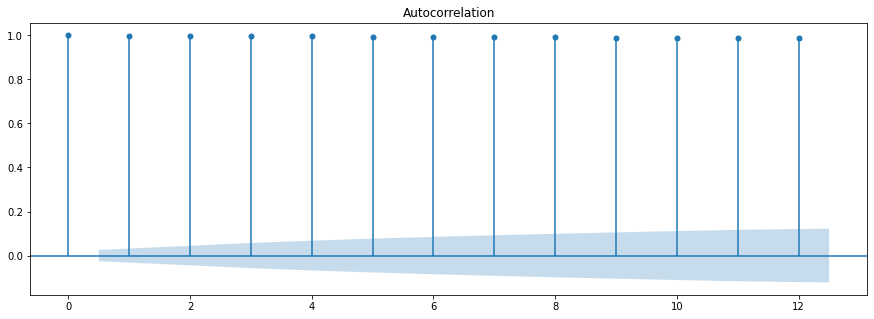

In [117]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(data['log'], lags=12)
plt.show()

Text(0.5, 1.0, 'Autocorrelation Function')

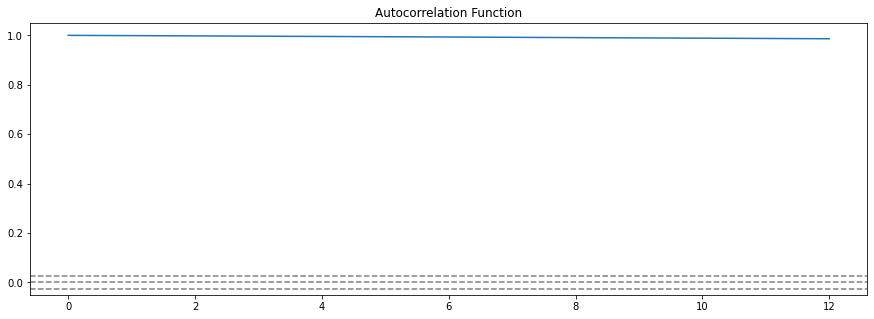

In [118]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data['log'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

In [119]:
from statsmodels.tsa.arima_model import ARIMA

In [120]:
model = ARIMA(data['log'], order=(2,1, 2))  
results_AR = model.fit(disp=1)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency infor

In [121]:
results_AR.fittedvalues

Date
1997-05-16    0.001233
1997-05-19    0.014573
1997-05-20    0.005186
1997-05-21    0.005417
1997-05-22    0.003793
                ...   
2020-07-27    0.006864
2020-07-28   -0.003611
2020-07-29    0.004355
2020-07-30   -0.000811
2020-07-31    0.003536
Length: 5841, dtype: float64

In [129]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy=True)
predictions_ARIMA_diff


Date
1997-05-16    0.001233
1997-05-19    0.014573
1997-05-20    0.005186
1997-05-21    0.005417
1997-05-22    0.003793
                ...   
2020-07-27    0.006864
2020-07-28   -0.003611
2020-07-29    0.004355
2020-07-30   -0.000811
2020-07-31    0.003536
Length: 5841, dtype: float64

In [128]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum


Date
1997-05-16    0.001233
1997-05-19    0.015806
1997-05-20    0.020992
1997-05-21    0.026409
1997-05-22    0.030203
                ...   
2020-07-27    7.204234
2020-07-28    7.200623
2020-07-29    7.204978
2020-07-30    7.204167
2020-07-31    7.207703
Length: 5841, dtype: float64

In [131]:
predictions_ARIMA_log = pd.Series(data['log'].iloc[0], index=data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log

Date
1997-05-15    0.890973
1997-05-16    0.892206
1997-05-19    0.906779
1997-05-20    0.911965
1997-05-21    0.917382
                ...   
2020-07-27    8.095207
2020-07-28    8.091596
2020-07-29    8.095951
2020-07-30    8.095140
2020-07-31    8.098676
Length: 5842, dtype: float64

Text(0.5, 1.0, 'RMSE: 216.6373')

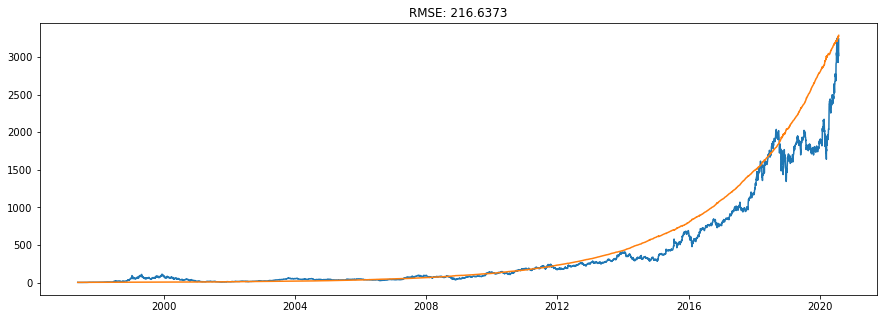

In [133]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(data['Open'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-data['Open'])**2)/len(data['Open'])))

In [134]:
x = results_AR.forecast(steps=10)

In [135]:
x = np.exp(x[0])
x

array([3229.0652215 , 3241.05485864, 3236.68776745, 3247.04831563,
       3245.74712114, 3254.05198726, 3254.5513975 , 3261.43196393,
       3263.11783992, 3269.05037376])

In [137]:
model = ARIMA(data['Open'].diff().dropna(),(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 5840
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -24154.858
Method:                       css-mle   S.D. of innovations             15.124
Date:                Tue, 19 Jul 2022   AIC                          48319.715
Time:                        18:36:52   BIC                          48353.078
Sample:                             1   HQIC                         48331.317
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      3.792      0.000       0.000       0.001
ar.L1.D.Open    -0.9973      0.003   -289.969      0.000      -1.004      -0.991
ma.L1.D.Open    -0.0444      0.007     -6.76

<AxesSubplot:title={'center':'Residuals'}, xlabel='Date'>

<AxesSubplot:title={'center':'Density'}, ylabel='Density'>

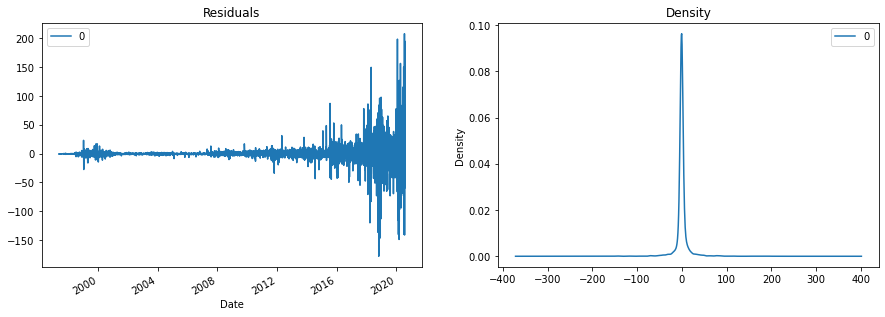

In [141]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

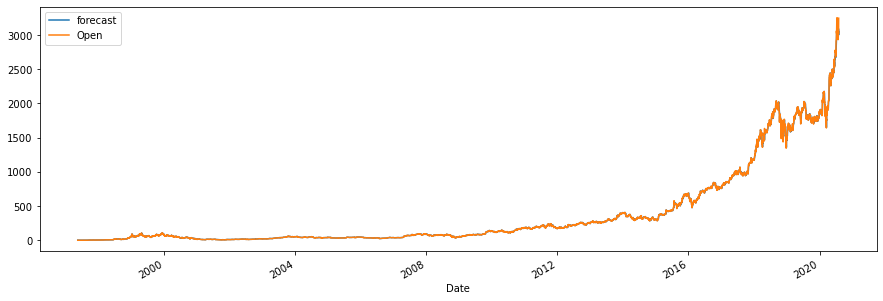

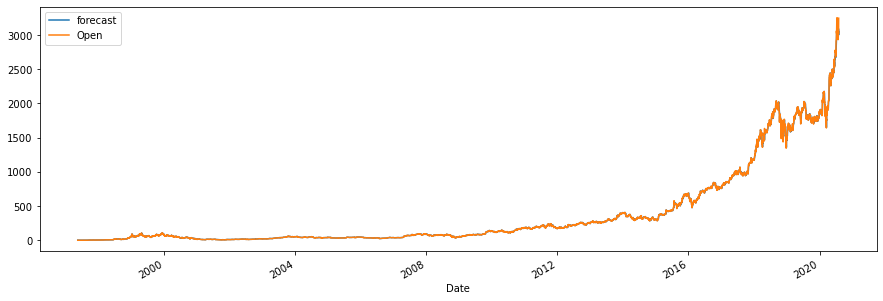

In [142]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()